# **3. 해당 데이터에서 Outcome을 삭제하고 BMI를 예측하는 회귀를 수행**

In [1]:
# pandas, numpy, matplotlib.pyplot, tensorflow 라이브러리를 가져옴
# sklearn 라이브러리에서 train_test_split함수를 사용
# train_test_split: 데이터를 학습용과 테스터용으로 나누는 데 사용
# seaborn 라이브러리를 가져옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
# 파일을 읽고 데이터프레임(df)로 저장
df = pd.read_csv("C:/Users/Yujin/Desktop/3-2/Deep-learning-application/dataset/diabetes.csv")

In [3]:
# 데이터프레임 출력
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


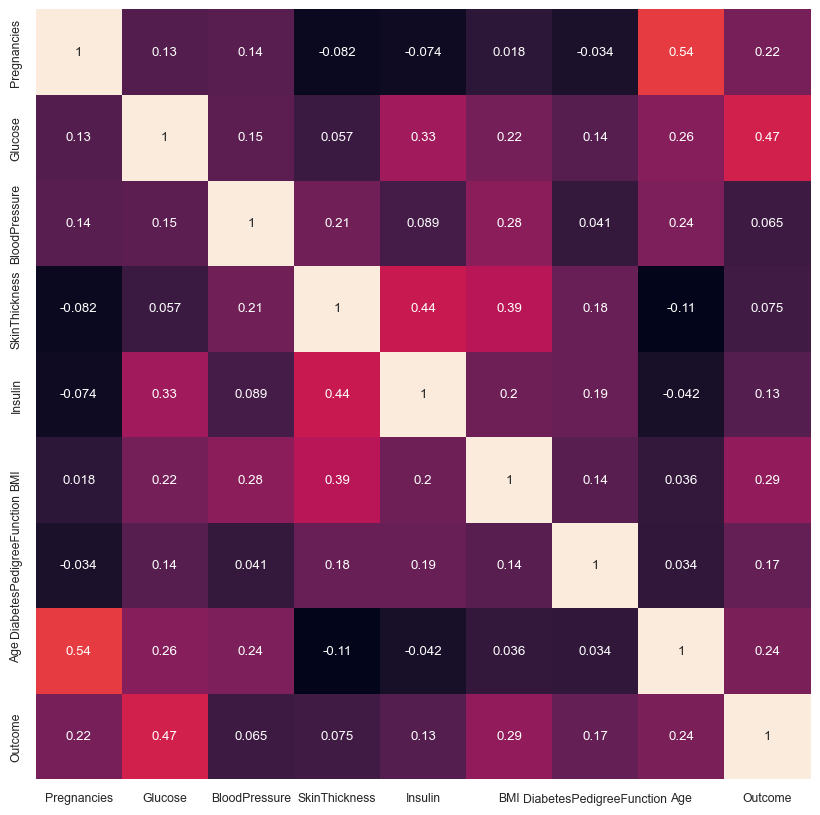

In [7]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


## **1. LR**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print('평균제곱근오차 sol1')
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

print('\n평균제곱근오차 sol2')
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

print('\n평균제곱근오차 sol3')
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 sol1
평균제곱근오차 0.16392743774224441

평균제곱근오차 sol2
평균제곱근오차 0.16392743774224441

평균제곱근오차 sol3
평균제곱근오차 0.16392743774224447


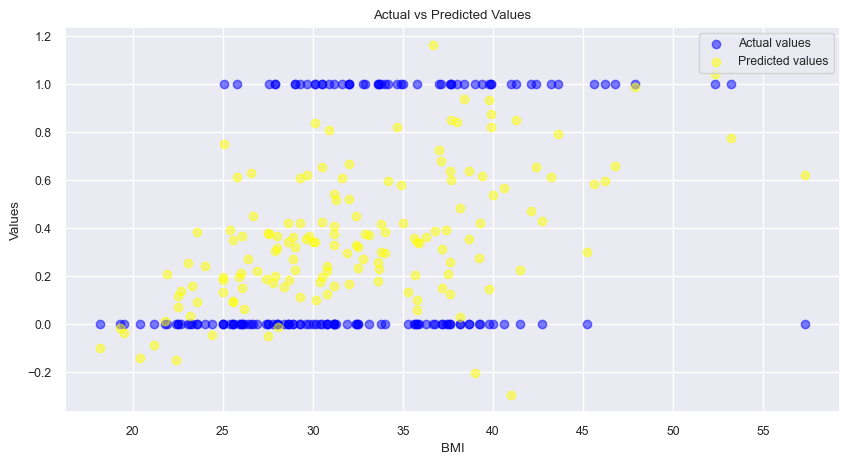

In [39]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['BMI'], y_test, label='Actual values', c='blue', alpha=0.5)
plt.scatter(X_test['BMI'], ly_preds, c='yellow', label='Predicted values', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## **2. DT**

In [41]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.21428571428571427


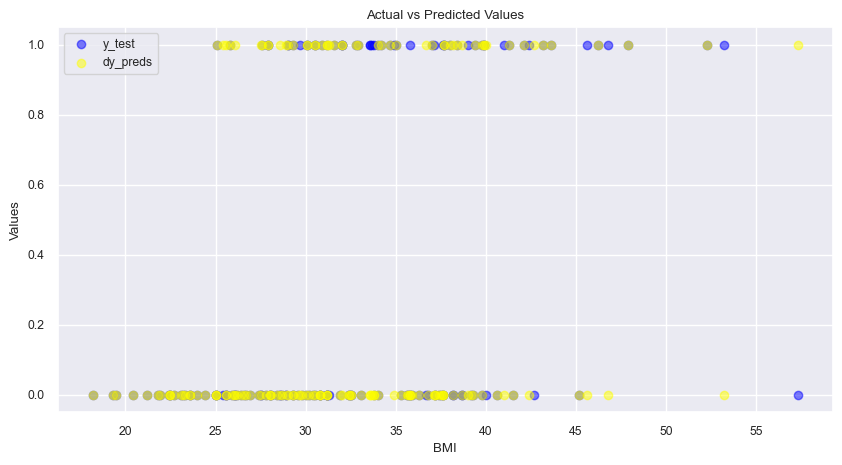

In [43]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['BMI'], y_test, label='y_test', c='blue', alpha=0.5)
plt.scatter(X_test['BMI'], dy_preds, c='yellow', label='dy_preds', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## **3. RF**

In [50]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.1550538961038961


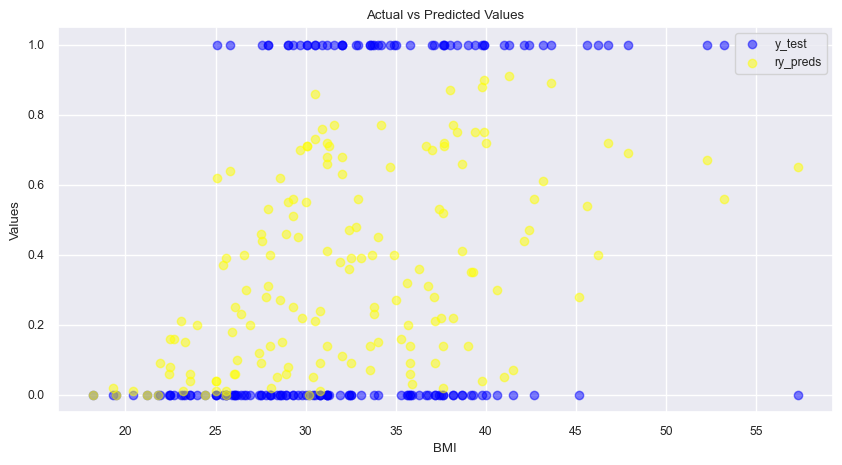

In [52]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['BMI'], y_test, label='y_test', c='blue', alpha=0.5)
plt.scatter(X_test['BMI'], ry_preds, c='yellow', label='ry_preds', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## **4. SVR**

In [54]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.17697198876848858


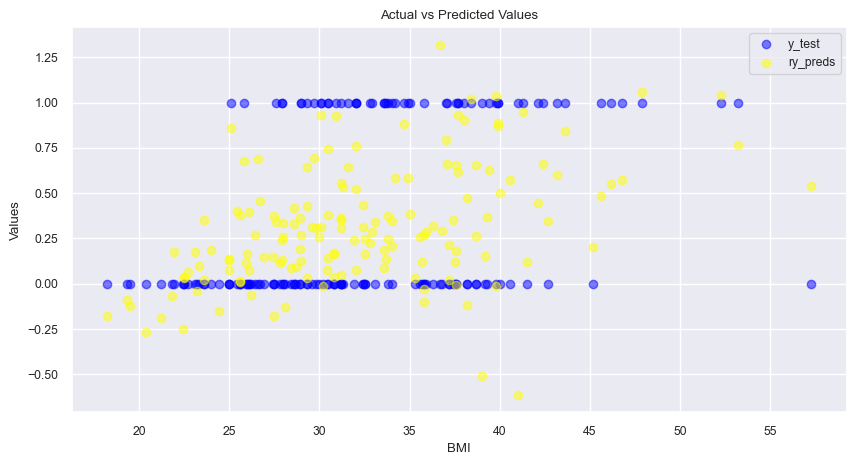

In [56]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['BMI'], y_test, label='y_test', c='blue', alpha=0.5)
plt.scatter(X_test['BMI'], ry_preds, c='yellow', label='ry_preds', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()